### **Bibliotecas**


In [10]:
!pip install yfinance --upgrade --no-cache-dir

In [11]:
!pip install yfinance

In [12]:
!pip install quantstats

In [13]:
!pip -q install yfinance

In [14]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import pandas as pd
import string
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pandas.util._tester import test
import pandas.testing
import pandas.arrays
import quantstats as qs
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

import urllib.request
from bs4 import BeautifulSoup

from itertools import combinations
import IPython
import cufflinks as cf
cf.go_offline()
#cf.getThemes()

## plotly
import plotly

# configurando o plotly para rodar adequadamento no google colab junto com cufflinks
plotly.io.renderers.defaut = 'colab'

In [15]:
from google.colab import files

In [16]:
qs.extend_pandas()

## **Capturando e tratando Dados**

##***Dados do site Fundamentos***

In [62]:
url = 'http://www.fundamentus.com.br/resultado.php'

In [63]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [64]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [67]:
df.sort_values('Liq.2meses', ascending=False).head(15)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
443,VALE3,66.83,3.58,1.89,1.134,"22,55%",0.726,16.11,1.88,-1.92,1.96,1.80,"60,25%","31,39%",1.24,"46,56%","52,78%",2.564840e+09,1.812960e+11,0.41,"27,44%"
426,PETR4,26.85,2.59,0.95,0.890,"8,95%",0.359,12.66,2.02,-0.81,3.54,2.58,"43,99%","34,56%",1.20,"19,61%","36,59%",2.293870e+09,3.690770e+11,0.88,"4,96%"
645,ITUB4,24.45,9.57,1.76,0.000,"2,88%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","18,41%",1.151650e+09,1.360420e+11,0.00,"-28,12%"
630,BBDC4,20.40,9.10,1.35,0.000,"5,59%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","14,87%",1.001380e+09,1.464880e+11,0.00,"29,19%"
764,B3SA3,12.00,15.70,3.24,7.118,"6,84%",1.484,9.98,11.13,-10.57,9.88,8.51,"63,92%","45,34%",1.59,"21,30%","20,64%",7.001200e+08,2.269270e+10,0.44,"37,30%"
822,PRIO3,23.80,21.57,3.86,6.861,"0,00%",1.990,4.53,18.15,48.11,17.58,10.18,"37,80%","31,81%",6.10,"19,74%","17,88%",6.194600e+08,5.421760e+09,0.71,"56,80%"
945,MGLU3,11.55,98.87,10.61,2.163,"0,35%",3.075,16.83,66.84,-42.65,67.34,41.05,"3,24%","2,19%",1.40,"7,65%","10,73%",5.934250e+08,7.265610e+09,0.32,"33,56%"
429,PETR3,27.48,2.65,0.97,0.911,"8,74%",0.368,12.95,2.07,-0.83,3.58,2.61,"43,99%","34,56%",1.20,"19,61%","36,59%",5.500650e+08,3.690770e+11,0.88,"4,96%"
516,SUZB3,49.77,5.54,5.01,1.806,"0,00%",0.598,3.27,4.87,-0.97,9.07,6.05,"37,11%","32,62%",3.32,"15,18%","90,48%",4.993300e+08,1.351850e+10,5.71,"41,36%"
561,JBSS3,36.76,6.80,2.20,0.301,"5,49%",0.536,4.16,4.39,-1.57,6.90,4.93,"6,86%","4,42%",1.48,"16,36%","32,41%",4.821380e+08,4.189820e+10,1.70,"17,37%"


In [68]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100


***Analisando os Dados - Fundamentus***

In [70]:
df = df[df['Liq.2meses'] > 10000000]

In [71]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values
ranking['ROE'] = df.sort_values(by=['ROE'], ascending=False)['Papel'][:150].values
ranking['Mrg. Líq.'] = df.sort_values(by=['Mrg. Líq.'], ascending=False)['Papel'][:150].values
ranking['EV/EBITDA'] = df.sort_values(by=['EV/EBITDA'], ascending=False)['Papel'][:150].values
ranking['Cresc. Rec.5a'] = df.sort_values(by=['Cresc. Rec.5a'], ascending=False)['Papel'][:150].values

In [72]:
ranking.head(15)

,pos,EV/EBIT,ROIC,ROE,Mrg. Líq.,EV/EBITDA,Cresc. Rec.5a
0,1,PSSA3,CMIN3,TASA4,LOGG3,CASH3,RCSL3
1,2,GOAU4,WIZS3,BEEF3,ITSA4,RCSL3,VAMO3
2,3,USIM5,PSSA3,BRKM5,LUPA3,LWSA3,VIVR3
3,4,EVEN3,TASA4,MRFG3,CESP6,ELET3,LCAM3
4,5,CMIN3,VALE3,SUZB3,TRPL4,ELET6,BPAC11
5,6,VALE3,UNIP6,VIVR3,ENAT3,AESB3,PRIO3
6,7,LAVV3,CSNA3,ASAI3,JPSA3,SOMA3,AGRO3
7,8,CSNA3,BLAU3,CSNA3,TAEE11,ITSA4,ALUP11
8,9,CIEL3,ETER3,ETER3,IGTA3,SMFT3,HBSA3
9,10,ETER3,MRFG3,LUPA3,BRPR3,MGLU3,JHSF3


In [73]:
a = ranking.pivot_table(columns='EV/EBIT', values='pos').head(15)

In [74]:
b = ranking.pivot_table(columns='ROIC', values='pos').head(15)

In [75]:
c = ranking.pivot_table(columns='ROE', values='pos')

In [76]:
d = ranking.pivot_table(columns='Mrg. Líq.', values='pos')

In [77]:
e = b = ranking.pivot_table(columns='EV/EBITDA', values='pos')

In [78]:
f = b = ranking.pivot_table(columns='Cresc. Rec.5a', values='pos')

In [ ]:
t = pd.concat([a,b,c,d,e,f])
t

In [ ]:
rank = t.dropna(axis=1).sum().head(15)
rank

In [81]:
rank.sort_values()[:15]

ALUP11    246
B3SA3     264
AGRO3     296
BLAU3     327
BEEF3     369
CESP6     382
BRKM5     418
CAML3     425
ABEV3     447
ARZZ3     470
CMIG4     487
ALLD3     611
AMBP3     659
BRFS3     662
CCRO3     677
dtype: int64

## ***Dados do site da B3*** 

In [174]:
def busca_carteira_teorica(indice): 
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [175]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [177]:
ibov = busca_carteira_teorica('ibov')

In [ ]:
ibov.sort_values('Part. (%)', ascending=False).head(15)

In [179]:
smll = busca_carteira_teorica('smll').head(15)

In [ ]:
smll.sort_values('Part. (%)', ascending=False).head(15)

In [181]:
ibrx = busca_carteira_teorica('ibrx')

In [ ]:
ibrx.sort_values('Part. (%)', ascending=False).head(15)

In [ ]:
pd.concat([ibov, ibrx], keys=['IBOV', 'IBRX'], axis=1)

###***Outros Dados B3 ***`

In [184]:
ibov = web.get_data_yahoo('^BVSP', start='2016-01-01', end='2021-09-01')

[*********************100%***********************]  1 of 1 completed


In [185]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300
2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200
2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900
2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300
2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600


In [186]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,120210.0,120818.0,119226.0,120818.0,120818.0,7520100
2021-08-26,120817.0,120833.0,118719.0,118724.0,118724.0,8426900
2021-08-27,118725.0,120678.0,118721.0,120678.0,120678.0,7323600
2021-08-30,120677.0,120684.0,119354.0,119740.0,119740.0,6391900
2021-08-31,119738.0,120157.0,117911.0,118781.0,118781.0,11535600


In [187]:
ibov.risk_return_ratio()

Open         0.051370
High         0.063989
Low          0.056382
Close        0.052021
Adj Close    0.052021
Volume       0.035253
dtype: float64

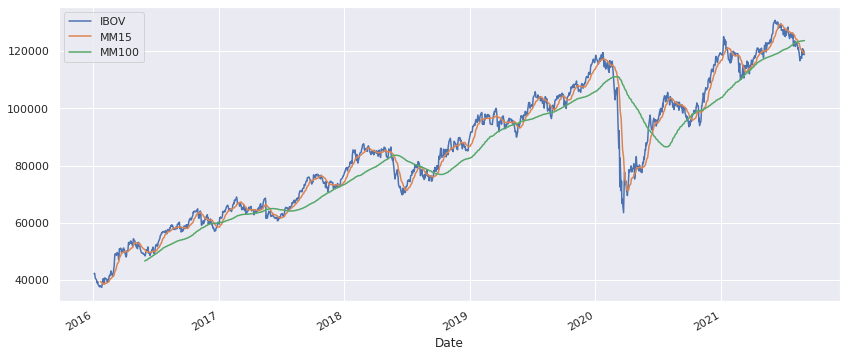

In [188]:
ibov["Close"].plot(figsize=(14,6), label="IBOV")
ibov["Close"].rolling(15).mean().plot(label="MM15")
ibov["Close"].rolling(100).mean().plot(label="MM100")
plt.legend();

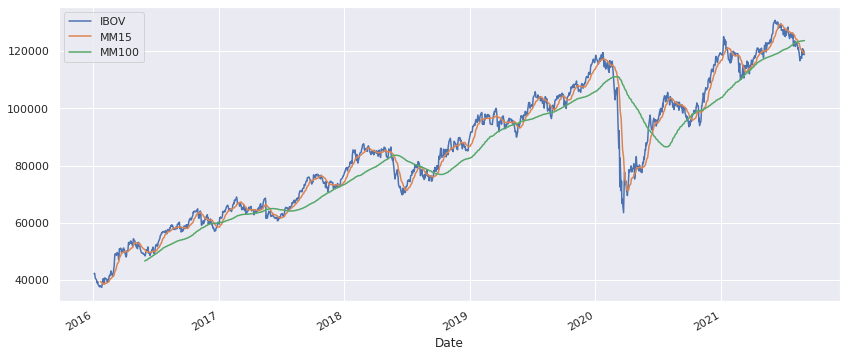

In [189]:
ibov_fatiado = ibov[(ibov.index.year >= 2016) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(14,6), label="IBOV")
ibov_fatiado["Close"].rolling(15).mean().plot(label="MM15")
ibov_fatiado["Close"].rolling(100).mean().plot(label="MM100")
plt.legend();

In [ ]:
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(15)

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2016]
ibov_fatiado.tail(15)

 **Yahoo Finance busca de códigos da Empresas que compõem os indices de acordo com as cotações **

In [ ]:
t = get_tickers('ibov')
t

In [ ]:
ibov = yf.download(t, period='1mo', group_by='ticker')
ibov

In [ ]:
ifix = yf.download(get_tickers('ifix'), period='1mo', group_by='ticker')
ifix

## **Quantstats**

In [111]:
qs.extend_pandas()

In [167]:
Vale = qs.utils.download_returns("vale3.sa")

In [ ]:
Vale.monthly_returns()

[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2000-01-03  2000-01-03
End Period          2021-11-03  2021-11-03
Risk-Free Rate      0.0%        0.0%
Time in Market      96.0%       99.0%

Cumulative Return   3,483.30%   523.84%
CAGR﹪              17.8%       8.74%

Sharpe              0.61        0.44
Sortino             0.9         0.62
Sortino/√2          0.64        0.44
Omega               1.11        1.11

Max Drawdown        -83.84%     -59.96%
Longest DD Days     3642        3400

Gain/Pain Ratio     0.11        0.08
Gain/Pain (1M)      0.71        0.45

Payoff Ratio        1.08        0.98
Profit Factor       1.11        1.08
Common Sense Ratio  1.23        1.05
CPC Index           0.61        0.55
Tail Ratio          1.1         0.97
Outlier Win Ratio   3.27        4.69
Outlier Loss Ratio  2.99        4.2

MTD                 -6.68%      2.04%
3M                  -32.28%     -13.79%
6M          

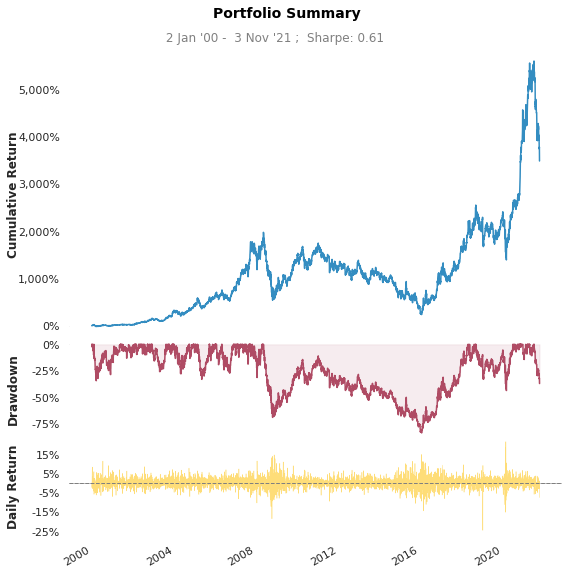

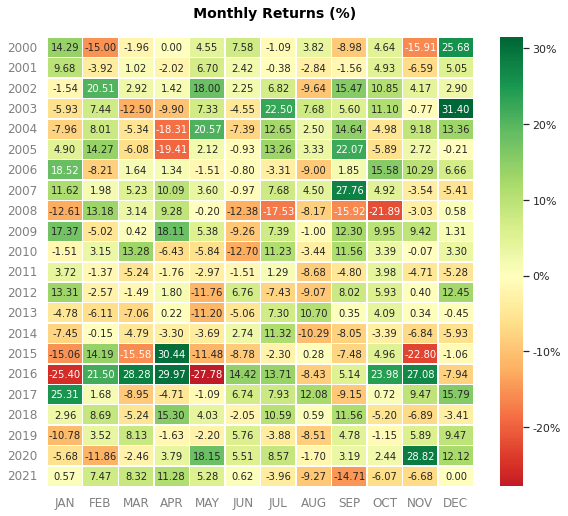

In [195]:
qs.reports.basic(Vale, benchmark="^BVSP");

## **Simulando uma carteira de ações**

In [ ]:
tickers = "VALE3.SA, ITUB4.SA, B3SA3.SA, PETR4.SA, BBDC4.SA, PETR3.SA, MGLU3.SA, ABEV3.SA, WEGE3.SA, SUZB3.SA, GNDI3.SA, ITSA4.SA, JBSS3.SA, NTCO3.SA, BBAS3.SA"
carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

In [ ]:
carteira.dropna(inplace=True)
carteira

In [ ]:
ibov.dropna(inplace=True)
ibov

# **Resultado**

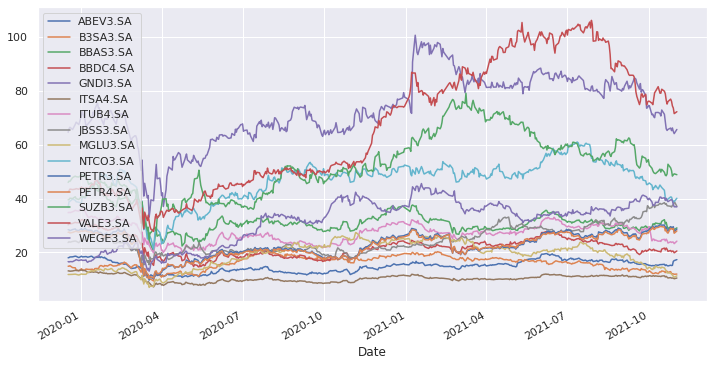

In [200]:
sns.set()
carteira.plot(figsize=(12,6));

In [201]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

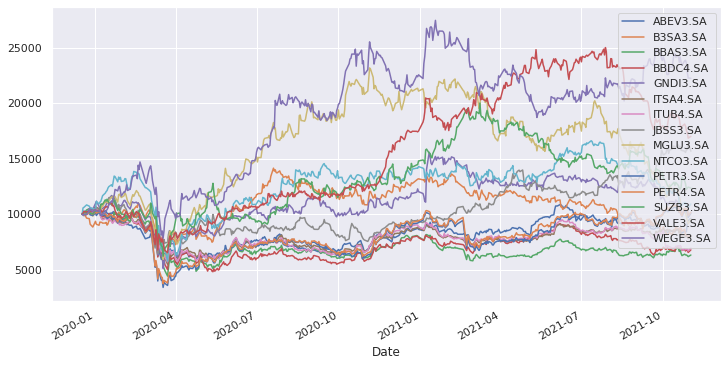

In [202]:
carteira_normalizada.plot(figsize=(12,6));

In [203]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

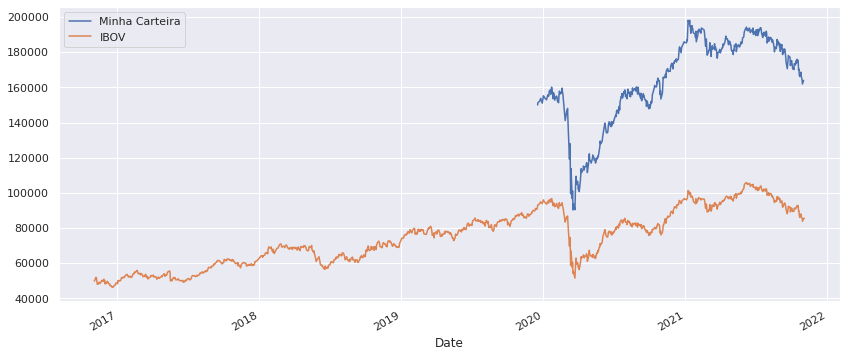

In [206]:
carteira_normalizada["saldo"].plot(figsize=(14,6), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [207]:
carteira_normalizada.describe()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,saldo
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,8265.359161,10820.057136,6957.325187,7240.378744,11266.638560,7893.995947,7848.025161,10483.341794,16058.572444,12692.787607,8077.119404,8236.594168,13110.898783,15614.137126,18974.310839,163539.542062
std,1204.832771,1676.350784,1181.461261,1239.603272,1907.484191,950.736684,1025.704311,2203.086428,4132.706155,2039.230850,1593.248320,1568.921912,2966.312074,5508.702559,4982.994233,25027.711071
min,5929.645619,6322.658540,4431.596355,4827.564382,5127.812884,5492.800500,5713.688499,6472.179981,5940.991422,5782.641027,3415.765280,3747.952879,6221.885527,6546.398516,7843.502916,90268.390728
25%,7223.899791,9382.441367,6275.774707,6237.544802,10130.108754,7200.067568,6987.640581,8721.053547,12057.923557,11521.280211,7079.582067,7196.835883,10360.753282,10633.577432,13681.125353,152134.347923
50%,8362.923447,11150.386755,6687.784550,7216.986907,11140.618541,7879.279730,7842.058651,9822.057784,17101.034708,13257.568601,7920.676522,8299.420627,12884.761436,15030.120328,20576.674994,168146.887691
75%,9164.840004,12015.727914,7095.662476,7908.466273,12757.386760,8550.420567,8637.921124,12104.913831,19387.949272,13845.402603,9536.009208,9622.281977,15129.517023,20462.721455,22564.408859,184257.912583
max,10866.960998,14148.384663,10624.013432,10632.237272,15582.418791,10272.009877,10429.105358,16471.081826,23171.075919,16614.483227,10642.280639,10791.896542,20010.108900,25001.230051,27450.576658,198144.334867


In [208]:
carteira_normalizada.plot_rolling_beta

<bound method rolling_beta of                 ABEV3.SA      B3SA3.SA  ...      WEGE3.SA          saldo
Date                                    ...                             
2019-12-18  10000.000000  10000.000000  ...  10000.000000  150000.000000
2019-12-19  10041.905720  10000.000000  ...   9911.504201  151368.631747
2019-12-20  10165.875883  10111.202997  ...   9997.049490  151539.200911
2019-12-23  10192.753410   9651.977536  ...   9978.811641  152013.850474
2019-12-26  10332.529031   9606.672564  ...  10291.846894  153749.346504
...                  ...           ...  ...           ...            ...
2021-10-26   8405.261422   8153.383365  ...  23862.595506  166471.558809
2021-10-27   8438.527861   8133.251733  ...  23585.823642  165266.734325
2021-10-28   9259.094563   8079.566953  ...  22761.523831  164450.213210
2021-10-29   9419.880678   7992.329027  ...  22262.129024  161920.599206
2021-11-01   9625.022750   8039.303049  ...  22238.061307  163937.006792

[460 rows x 16 colum

## **Salvando Dados em Excel**

In [ ]:
ibov.to_excel('ibovteste1.xlsx')
files.download('ibovteste1.xlsx')

In [ ]:
ifix.to_excel('ifix.xlsx')
files.download('ifix.xlsx')

In [ ]:
carteira_normalizada.to_excel('resultadocarteira.xlsx')
files.download

In [ ]:
ibov_normalizado.to_excel('ibovnormalizado.xlsx')
files.download

### **Salvando Dados em CSV**





In [ ]:
ibov.to_csv('ibovteste1.csv')
files.download('ibovteste1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ifix.to_csv('ifix.csv')
files.download('ifix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>